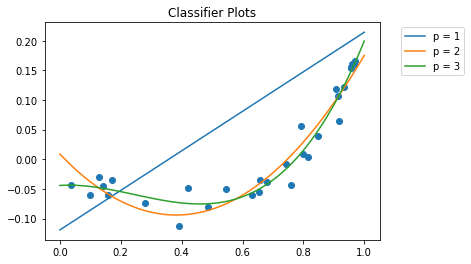

In [33]:
from scipy.sparse.construct import vstack
from google.colab import drive 
#drive.mount('/content/drive')
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

in_data = loadmat('/content/drive/My Drive/Colab Notebooks/polydata.mat')

a = in_data['a']
b = in_data['b']

# for p=1 (1+x)
A=np.column_stack(([1]*len(a), a))
x=np.linalg.inv(np.transpose(A)@A)@np.transpose(A)@b

# for p=2 (1+x+x^2)
A_2=np.column_stack((A, a**2))
x_2=np.linalg.inv(np.transpose(A_2)@A_2)@np.transpose(A_2)@b

# for p=3 (1+x+x^2+x^3)
A_3=np.column_stack((A_2, a**3))
x_3=np.linalg.inv(np.transpose(A_3)@A_3)@np.transpose(A_3)@b

plt.scatter(a, b)
plt.title('Classifier Plots')
l = np.linspace(0, 1, 100)
plt.plot(x, label='p = 1')

y_2 = np.array([np.sum(np.array([x_2[i]*(j**i) for i in range(len(x_2))])) for j in l])
plt.plot(l, y_2, label='p = 2')

y_3 = np.array([np.sum(np.array([x_3[i]*(j**i) for i in range(len(x_3))])) for j in l])
plt.plot(l, y_3, label='p = 3')

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.show()